#2. Similarity measures
#2.1 Jaccard Distance:
##http://www.statisticshowto.com/jaccard-index/

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [2]:
train_graph=nx.read_edgelist('/content/drive/MyDrive/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(train_graph))

DiGraph with 1780722 nodes and 7550015 edges


In [4]:
#for followees
def jaccard_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (len(set(train_graph.successors(a)).union(set(train_graph.successors(b)))))
    except:
        return 0
    return sim

In [5]:
#one test case
print(jaccard_for_followees(273084,1505602))

0.0


In [6]:
#node 1635354 not in graph 
print(jaccard_for_followees(273084,1505602))

0.0


In [7]:
#for followers
def jaccard_for_followers(a,b):
    try:
        if len(set(train_graph.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                 (len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

In [8]:
print(jaccard_for_followers(273084,470294))

0


In [9]:
#node 1635354 not in graph 
print(jaccard_for_followees(669354,1635354))

0


#2.2 Cosine distance

In [10]:
#for followees
def cosine_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (math.sqrt(len(set(train_graph.successors(a)))*len((set(train_graph.successors(b))))))
        return sim
    except:
        return 0

In [11]:
print(cosine_for_followees(273084,1505602))

0.0


In [12]:
print(cosine_for_followees(273084,1635354))

0


In [13]:
def cosine_for_followers(a,b):
    try:
        
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                     (math.sqrt(len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0


In [14]:
print(cosine_for_followers(2,470294))

0.02886751345948129


In [15]:
print(cosine_for_followers(669354,1635354))

0


#3. Ranking Measures
https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links.


##Mathematical PageRanks for a simple network, expressed as percentages. (Google uses a logarithmic scale.) Page C has a higher PageRank than Page E, even though there are fewer links to C; the one link to C comes from an important page and hence is of high value. If web surfers who start on a random page have an 85% likelihood of choosing a random link from the page they are currently visiting, and a 15% likelihood of jumping to a page chosen at random from the entire web, they will reach Page E 8.1% of the time. (The 15% likelihood of jumping to an arbitrary page corresponds to a damping factor of 85%.) Without damping, all web surfers would eventually end up on Pages A, B, or C, and all other pages would have PageRank zero. In the presence of damping, Page A effectively links to all pages in the web, even though it has no outgoing links of its own.

##3.1 Page Ranking
https://en.wikipedia.org/wiki/PageRank

In [16]:
if not os.path.isfile('page_rank.p'):
    pr = nx.pagerank(train_graph, alpha=0.85)
    pickle.dump(pr,open('page_rank.p','wb'))
else:
    pr = pickle.load(open('page_rank.p','rb'))

In [17]:
print('min',pr[min(pr, key=pr.get)])
print('max',pr[max(pr, key=pr.get)])
print('mean',float(sum(pr.values())) / len(pr))

min 1.6556497245737814e-07
max 2.709825134193587e-05
mean 5.615699699389075e-07


In [18]:
#for imputing to nodes which are not there in Train data
mean_pr = float(sum(pr.values())) / len(pr)
print(mean_pr)

5.615699699389075e-07


#4. Other Graph Features
##4.1 Shortest path:
Getting Shortest path between twoo nodes, if nodes have direct path i.e directly connected then we are removing that edge and calculating path.

In [19]:
#if has direct edge then deleting that edge and calculating shortest path
def compute_shortest_path_length(a,b):
    p=-1
    try:
        if train_graph.has_edge(a,b):
            train_graph.remove_edge(a,b)
            p= nx.shortest_path_length(train_graph,source=a,target=b)
            train_graph.add_edge(a,b)
        else:
            p= nx.shortest_path_length(train_graph,source=a,target=b)
        return p
    except:
        return -1

In [20]:
#testing
compute_shortest_path_length(77697, 826021)

10

In [21]:
#testing
compute_shortest_path_length(669354,1635354)

-1

#4.2 Checking for same community

In [22]:
#getting weekly connected edges from graph 
wcc=list(nx.weakly_connected_components(train_graph))
def belongs_to_same_wcc(a,b):
    index = []
    if train_graph.has_edge(b,a):
        return 1
    if train_graph.has_edge(a,b):
            for i in wcc:
                if a in i:
                    index= i
                    break
            if (b in index):
                train_graph.remove_edge(a,b)
                if compute_shortest_path_length(a,b)==-1:
                    train_graph.add_edge(a,b)
                    return 0
                else:
                    train_graph.add_edge(a,b)
                    return 1
            else:
                return 0
    else:
            for i in wcc:
                if a in i:
                    index= i
                    break
            if(b in index):
                return 1
            else:
                return 0

In [23]:
belongs_to_same_wcc(861, 1659750)

0

In [24]:
belongs_to_same_wcc(669354,1635354)

0

#4.3 Adamic/Adar Index:
##Adamic/Adar measures is defined as inverted sum of degrees of common neighbours for given two vertices.
 


In [25]:
#adar index
def calc_adar_in(a,b):
    sum=0
    try:
        n=list(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(train_graph.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0

In [26]:
calc_adar_in(1,189226)

0

In [27]:
calc_adar_in(669354,1635354)

0

#4.4 Is persion was following back:

In [28]:
def follows_back(a,b):
    if train_graph.has_edge(b,a):
        return 1
    else:
        return 0

In [29]:
follows_back(1,189226)

1

In [30]:
follows_back(669354,1635354)

0

#4.5 Katz Centrality:
https://en.wikipedia.org/wiki/Katz_centrality

https://www.geeksforgeeks.org/katz-centrality-centrality-measure/ Katz centrality computes the centrality for a node based on the centrality of its neighbors. It is a generalization of the eigenvector centrality. The Katz centrality for node i is

 
where A is the adjacency matrix of the graph G with eigenvalues
.

The parameter
controls the initial centrality and



In [31]:
if not os.path.isfile('katz.p'):
    katz = nx.katz.katz_centrality(train_graph,alpha=0.005,beta=1)
    pickle.dump(katz,open('katz.p','wb'))
else:
    katz = pickle.load(open('katz.p','rb'))

In [32]:
print('min',katz[min(katz, key=katz.get)])
print('max',katz[max(katz, key=katz.get)])
print('mean',float(sum(katz.values())) / len(katz))

min 0.0007313532484065916
max 0.003394554981699122
mean 0.0007483800935562018


#4.6 Hits Score
The HITS algorithm computes two numbers for a node. Authorities estimates the node value based on the incoming links. Hubs estimates the node value based on outgoing links.

https://en.wikipedia.org/wiki/HITS_algorithm

In [33]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm


In [34]:
if not os.path.isfile('hits.p'):
    hits = nx.hits(train_graph, max_iter=100, tol=1e-08, nstart=None, normalized=True)
    pickle.dump(hits,open('hits.p','wb'))
else:
    hits = pickle.load(open('hits.p','rb'))

In [35]:
 print('min',hits[0][min(hits[0], key=hits[0].get)])
print('max',hits[0][max(hits[0], key=hits[0].get)])
print('mean',float(sum(hits[0].values())) / len(hits[0]))


min -1.4162844390828903e-20
max 0.0048686533795389815
mean 5.615699699308682e-07


#5. Featurization


In [36]:
import random
if os.path.isfile('/content/drive/MyDrive/train_after_eda.csv'):
    filename = "/content/drive/MyDrive/train_after_eda.csv"
    # you uncomment this line, if you dont know the lentgh of the file name
    # here we have hardcoded the number of lines as 15100030
    # n_train = sum(1 for line in open(filename)) #number of records in file (excludes header)
    n_train =  15100028
    s = 100000 #desired sample size
    skip_train = sorted(random.sample(range(1,n_train+1),n_train-s))
    #https://stackoverflow.com/a/22259008/4084039

In [37]:
if os.path.isfile('/content/drive/MyDrive/train_after_eda.csv'):
    filename = "/content/drive/MyDrive/test_after_eda.csv"
    # you uncomment this line, if you dont know the lentgh of the file name
    # here we have hardcoded the number of lines as 3775008
    # n_test = sum(1 for line in open(filename)) #number of records in file (excludes header)
    n_test = 3775006
    s = 50000 #desired sample size
    skip_test = sorted(random.sample(range(1,n_test+1),n_test-s))
    #https://stackoverflow.com/a/22259008/4084039

In [38]:
print("Number of rows in the train data file:", n_train)
print("Number of rows we are going to elimiate in train data are",len(skip_train))
print("Number of rows in the test data file:", n_test)
print("Number of rows we are going to elimiate in test data are",len(skip_test))

Number of rows in the train data file: 15100028
Number of rows we are going to elimiate in train data are 15000028
Number of rows in the test data file: 3775006
Number of rows we are going to elimiate in test data are 3725006


In [39]:
df_final_train = pd.read_csv('/content/drive/MyDrive/train_after_eda.csv', skiprows=skip_train, names=['source_node', 'destination_node'])
df_final_train['indicator_link'] = pd.read_csv('/content/drive/MyDrive/train_y.csv', skiprows=skip_train, names=['indicator_link'])
print("Our train matrix size ",df_final_train.shape)
df_final_train.head(2)

Our train matrix size  (100002, 3)


,source_node,destination_node,indicator_link
0,273084,1505602,1
1,18517,1166989,1


In [40]:
df_final_test = pd.read_csv('/content/drive/MyDrive/test_after_eda.csv', skiprows=skip_test, names=['source_node', 'destination_node'])
df_final_test['indicator_link'] = pd.read_csv('/content/drive/MyDrive/test_y.csv', skiprows=skip_test, names=['indicator_link'])
print("Our test matrix size ",df_final_test.shape)
df_final_test.head(2)

Our test matrix size  (50002, 3)


,source_node,destination_node,indicator_link
0,848424,784690,1
1,213034,758058,1


#5.2 Adding a set of features
we will create these each of these features for both train and test data points

1.jaccard_followers.
2.jaccard_followees.
cosine_followers
cosine_followees
num_followers_s
num_followees_s
num_followers_d
num_followees_d
inter_followers
inter_followees

In [41]:

if not os.path.isfile('/content/drive/MyDrive/storage_sample_stage1.h5'):
    #mapping jaccrd followers to train and test data
    df_final_train['jaccard_followers'] = df_final_train.apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)
    df_final_test['jaccard_followers'] = df_final_test.apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)

    #mapping jaccrd followees to train and test data
    df_final_train['jaccard_followees'] = df_final_train.apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
    df_final_test['jaccard_followees'] = df_final_test.apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
    

        #mapping jaccrd followers to train and test data
    df_final_train['cosine_followers'] = df_final_train.apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)
    df_final_test['cosine_followers'] = df_final_test.apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)

    #mapping jaccrd followees to train and test data
    df_final_train['cosine_followees'] = df_final_train.apply(lambda row:
                                            cosine_for_followees(row['source_node'],row['destination_node']),axis=1)
    df_final_test['cosine_followees'] = df_final_test.apply(lambda row:
                                            cosine_for_followees(row['source_node'],row['destination_node']),axis=1)

In [42]:
def compute_features_stage1(df_final):
    #calculating no of followers followees for source and destination
    #calculating intersection of followers and followees for source and destination
    num_followers_s=[]
    num_followees_s=[]
    num_followers_d=[]
    num_followees_d=[]
    inter_followers=[]
    inter_followees=[]
    for i,row in df_final.iterrows():
        try:
            s1=set(train_graph.predecessors(row['source_node']))
            s2=set(train_graph.successors(row['source_node']))
        except:
            s1 = set()
            s2 = set()
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
            d2=set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set()
        num_followers_s.append(len(s1))
        num_followees_s.append(len(s2))

        num_followers_d.append(len(d1))
        num_followees_d.append(len(d2))

        inter_followers.append(len(s1.intersection(d1)))
        inter_followees.append(len(s2.intersection(d2)))
    
    return num_followers_s, num_followers_d, num_followees_s, num_followees_d, inter_followers, inter_followees

In [43]:
if not os.path.isfile('/content/drive/MyDrive/storage_sample_stage1.h5'):
    df_final_train['num_followers_s'], df_final_train['num_followers_d'], \
    df_final_train['num_followees_s'], df_final_train['num_followees_d'], \
    df_final_train['inter_followers'], df_final_train['inter_followees']= compute_features_stage1(df_final_train)
    
    df_final_test['num_followers_s'], df_final_test['num_followers_d'], \
    df_final_test['num_followees_s'], df_final_test['num_followees_d'], \
    df_final_test['inter_followers'], df_final_test['inter_followees']= compute_features_stage1(df_final_test)
    
    hdf = HDFStore('/content/drive/MyDrive/storage_sample_stage1.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('/content/drive/MyDrive/storage_sample_stage1.h5', 'train_df',mode='r')
    df_final_test = read_hdf('/content/drive/MyDrive/storage_sample_stage1.h5', 'test_df',mode='r')

#5.3 Adding new set of features
we will create these each of these features for both train and test data points

adar index
is following back
belongs to same weakly connect components
shortest path between source and destination

In [44]:
if not os.path.isfile('/content/drive/MyDrive/storage_sample_stage2.h5'):
    #mapping adar index on train
    df_final_train['adar_index'] = df_final_train.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)
    #mapping adar index on test
    df_final_test['adar_index'] = df_final_test.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)

    #--------------------------------------------------------------------------------------------------------
    #mapping followback or not on train
    df_final_train['follows_back'] = df_final_train.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

    #mapping followback or not on test
    df_final_test['follows_back'] = df_final_test.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

    #mapping same component of wcc or not on train
    df_final_train['same_comp'] = df_final_train.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

    ##mapping same component of wcc or not on train
    df_final_test['same_comp'] = df_final_test.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)
    
    #mapping shortest path on train 
    df_final_train['shortest_path'] = df_final_train.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)
    #mapping shortest path on test
    df_final_test['shortest_path'] = df_final_test.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)

    hdf = HDFStore('storage_sample_stage2.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('/content/drive/MyDrive/storage_sample_stage2.h5', 'train_df',mode='r')
    df_final_test = read_hdf('/content/drive/MyDrive/storage_sample_stage2.h5', 'test_df',mode='r')


#5.4 Adding new set of features
we will create these each of these features for both train and test data points

Weight Features
weight of incoming edges
weight of outgoing edges
weight of incoming edges + weight of outgoing edges
weight of incoming edges * weight of outgoing edges
2*weight of incoming edges + weight of outgoing edges
weight of incoming edges + 2*weight of outgoing edges
Page Ranking of source
Page Ranking of dest
katz of source
katz of dest
hubs of source
hubs of dest
authorities_s of source
authorities_s of dest
Weight Features
In order to determine the similarity of nodes, an edge weight value was calculated between nodes. Edge weight decreases as the neighbor count goes up. Intuitively, consider one million people following a celebrity on a social network then chances are most of them never met each other or the celebrity. On the other hand, if a user has 30 contacts in his/her social network, the chances are higher that many of them know each other. credit - Graph-based Features for Supervised Link Prediction William Cukierski, Benjamin Hamner, Bo Yang

 
 
it is directed graph so calculated Weighted in and Weighted out differently

In [45]:
#weight for source and destination of each link
Weight_in = {}
Weight_out = {}
for i in  tqdm(train_graph.nodes()):
    s1=set(train_graph.predecessors(i))
    w_in = 1.0/(np.sqrt(1+len(s1)))
    Weight_in[i]=w_in
    
    s2=set(train_graph.successors(i))
    w_out = 1.0/(np.sqrt(1+len(s2)))
    Weight_out[i]=w_out
    
#for imputing with mean
mean_weight_in = np.mean(list(Weight_in.values()))
mean_weight_out = np.mean(list(Weight_out.values()))

100%|██████████| 1780722/1780722 [00:16<00:00, 108889.96it/s]


In [46]:
if not os.path.isfile('/content/drive/MyDrive/storage_sample_stage3.h5'):
    #mapping to pandas train
    df_final_train['weight_in'] = df_final_train.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
    df_final_train['weight_out'] = df_final_train.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))

    #mapping to pandas test
    df_final_test['weight_in'] = df_final_test.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
    df_final_test['weight_out'] = df_final_test.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))


    #some features engineerings on the in and out weights
    df_final_train['weight_f1'] = df_final_train.weight_in + df_final_train.weight_out
    df_final_train['weight_f2'] = df_final_train.weight_in * df_final_train.weight_out
    df_final_train['weight_f3'] = (2*df_final_train.weight_in + 1*df_final_train.weight_out)
    df_final_train['weight_f4'] = (1*df_final_train.weight_in + 2*df_final_train.weight_out)

    #some features engineerings on the in and out weights
    df_final_test['weight_f1'] = df_final_test.weight_in + df_final_test.weight_out
    df_final_test['weight_f2'] = df_final_test.weight_in * df_final_test.weight_out
    df_final_test['weight_f3'] = (2*df_final_test.weight_in + 1*df_final_test.weight_out)
    df_final_test['weight_f4'] = (1*df_final_test.weight_in + 2*df_final_test.weight_out)

In [47]:
if not os.path.isfile('/content/drive/MyDrive/storage_sample_stage3.h5'):
    
    #page rank for source and destination in Train and Test
    #if anything not there in train graph then adding mean page rank 
    df_final_train['page_rank_s'] = df_final_train.source_node.apply(lambda x:pr.get(x,mean_pr))
    df_final_train['page_rank_d'] = df_final_train.destination_node.apply(lambda x:pr.get(x,mean_pr))

    df_final_test['page_rank_s'] = df_final_test.source_node.apply(lambda x:pr.get(x,mean_pr))
    df_final_test['page_rank_d'] = df_final_test.destination_node.apply(lambda x:pr.get(x,mean_pr))
    #================================================================================

    #Katz centrality score for source and destination in Train and test
    #if anything not there in train graph then adding mean katz score
    df_final_train['katz_s'] = df_final_train.source_node.apply(lambda x: katz.get(x,mean_katz))
    df_final_train['katz_d'] = df_final_train.destination_node.apply(lambda x: katz.get(x,mean_katz))

    df_final_test['katz_s'] = df_final_test.source_node.apply(lambda x: katz.get(x,mean_katz))
    df_final_test['katz_d'] = df_final_test.destination_node.apply(lambda x: katz.get(x,mean_katz))
    #================================================================================

    #Hits algorithm score for source and destination in Train and test
    #if anything not there in train graph then adding 0
    df_final_train['hubs_s'] = df_final_train.source_node.apply(lambda x: hits[0].get(x,0))
    df_final_train['hubs_d'] = df_final_train.destination_node.apply(lambda x: hits[0].get(x,0))

    df_final_test['hubs_s'] = df_final_test.source_node.apply(lambda x: hits[0].get(x,0))
    df_final_test['hubs_d'] = df_final_test.destination_node.apply(lambda x: hits[0].get(x,0))
    #================================================================================

    #Hits algorithm score for source and destination in Train and Test
    #if anything not there in train graph then adding 0
    df_final_train['authorities_s'] = df_final_train.source_node.apply(lambda x: hits[1].get(x,0))
    df_final_train['authorities_d'] = df_final_train.destination_node.apply(lambda x: hits[1].get(x,0))

    df_final_test['authorities_s'] = df_final_test.source_node.apply(lambda x: hits[1].get(x,0))
    df_final_test['authorities_d'] = df_final_test.destination_node.apply(lambda x: hits[1].get(x,0))
    #================================================================================

    hdf = HDFStore('/content/drive/MyDrive/storage_sample_stage3.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('/content/drive/MyDrive/storage_sample_stage3.h5', 'train_df',mode='r')
    df_final_test = read_hdf('/content/drive/MyDrive/storage_sample_stage3.h5', 'test_df',mode='r')

In [48]:
df_final_train.head(5)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18


In [49]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [50]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('/content/drive/MyDrive/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('/content/drive/MyDrive/storage_sample_stage4.h5', 'test_df',mode='r')

In [51]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [52]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

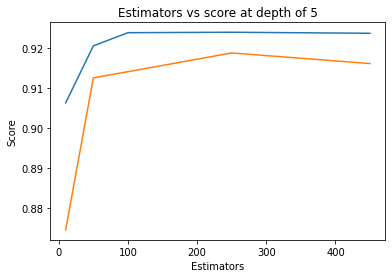

In [53]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


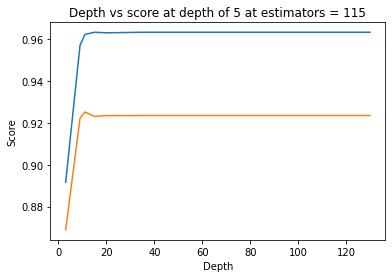

In [54]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    classification = RandomForestClassifier(bootstrap=True, criterion='gini',
            max_depth=i, max_features='auto',  min_impurity_decrease=0.0, min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    
    # fitting the data 
    classification.fit(df_final_train,y_train)

    # predicting the final train data for classification 
    train_classifi = f1_score(y_train,classification.predict(df_final_train))
    test_classifi = f1_score(y_test,classification.predict(df_final_test))

    # 
    test_scores.append(test_classifi)
    train_scores.append(train_classifi)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [55]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

classification = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(classification, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6427373d10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6427373ed0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6427373650>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6427383dd0>},
                   random_state=25, scoring='f1')

# printing the best parameter for model 

In [56]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [57]:
classification = RandomForestClassifier(bootstrap=True,  criterion='gini', max_depth=14, max_features='auto', 
            min_impurity_decrease=0.0,  min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [58]:
classification.fit(df_final_train,y_train)
y_train_pred = classification.predict(df_final_train)
y_test_pred = classification.predict(df_final_test)

In [59]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [60]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


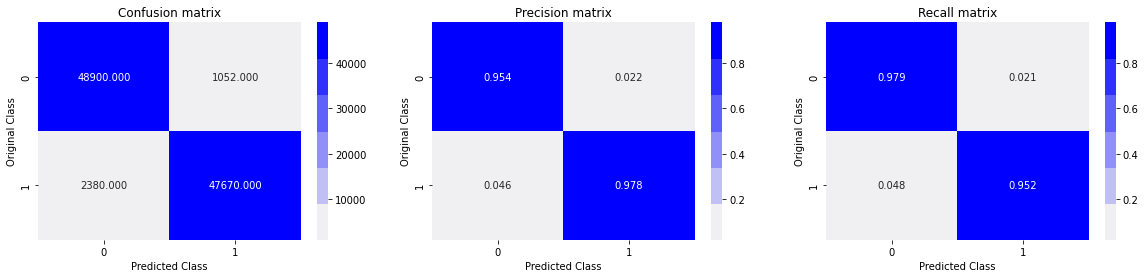

Test confusion_matrix


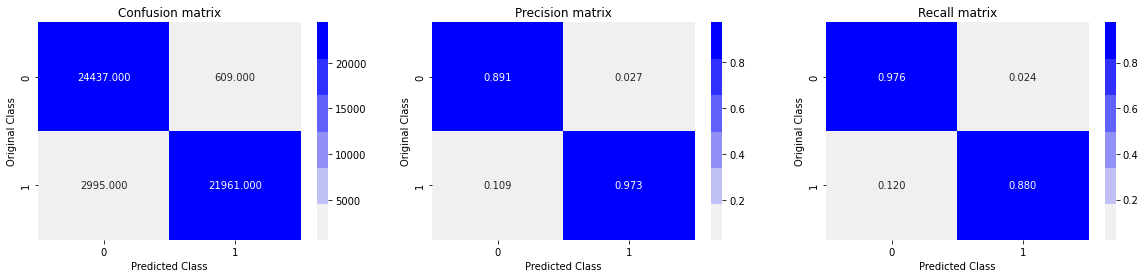

In [61]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

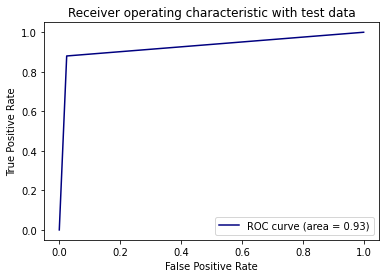

In [62]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

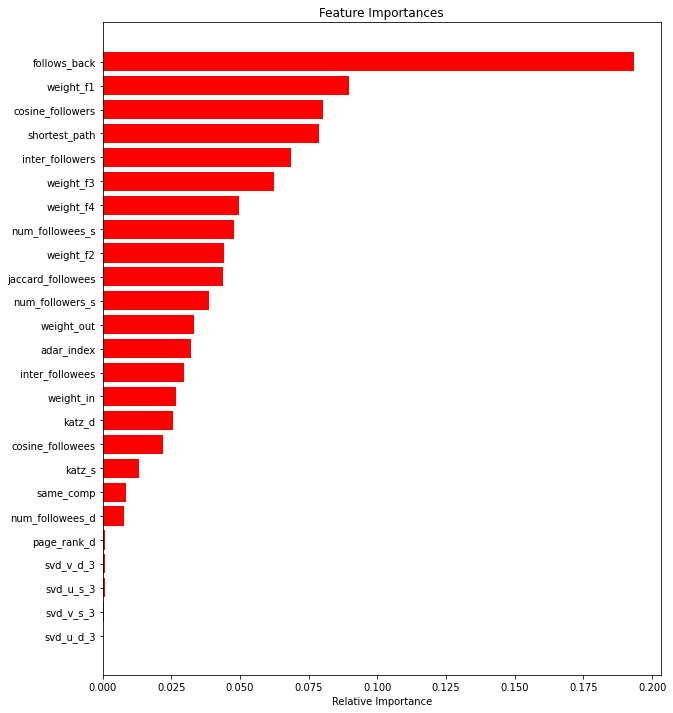

In [63]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#**Refer : https://www.kaggle.com/code/genialgokul1099/social-network-graph-link-predictionPreferential-Attachments**

#Adding new feature Preferential Attachement
One well-known concept in social networks is that users with many friends tend to create more connections in the future. This is due to the fact that in some social networks, like in finance, the rich get richer. We estimate how ”rich” our two vertices are by calculating the multiplication between the number of friends (|Γ(x)|) or followers each vertex has.

Preferential Attachement for followers

In [64]:
#for followees
def prefential_attachment_for_followers(num_followers_s,num_followers_d):
    try:
        if len(set(train_graph.successors(num_followers_s))) == 0  | len(set(train_graph.successors(num_followers_d))) == 0:
            return 0
        sim = (len(set(train_graph.successors(num_followers_s)).intersection(set(train_graph.successors(num_followers_d)))))/\
                                    (len(set(train_graph.successors(num_followers_s)).union(set(train_graph.successors(num_followers_d)))))
    except:
        return 0
    return sim

In [65]:
#for followees
def prefential_attachment_for_followee(num_followee_s,num_followee_d):
    try:
        if len(set(train_graph.successors(num_followee_s))) == 0  | len(set(train_graph.successors(num_followee_d))) == 0:
            return 0
        sim = (len(set(train_graph.successors(num_followee_s)).intersection(set(train_graph.successors(num_followee_d)))))/\
                                    (len(set(train_graph.successors(num_followee_s)).union(set(train_graph.successors(num_followee_d)))))
    except:
        return 0
    return sim

In [66]:
def compute_features_stage1(df_final):
    #calculating no of followers followees for source and destination
    #calculating intersection of followers and followees for source and destination
    num_followers_s=[]
    num_followees_s=[]
    num_followers_d=[]
    num_followees_d=[]
    inter_followers=[]
    inter_followees=[]
    for i,row in df_final.iterrows():
        try:
            s1=set(train_graph.predecessors(row['source_node']))
            s2=set(train_graph.successors(row['source_node']))
        except:
            s1 = set()
            s2 = set()
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
            d2=set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set()
        num_followers_s.append(len(s1))
        num_followees_s.append(len(s2))

        num_followers_d.append(len(d1))
        num_followees_d.append(len(d2))

        inter_followers.append(len(s1.intersection(d1)))
        inter_followees.append(len(s2.intersection(d2)))
    
    return num_followers_s, num_followers_d, num_followees_s, num_followees_d, inter_followers, inter_followees

In [67]:
if not os.path.isfile('storage_sample_stage1.h5'):
    df_final_train['num_followers_s'], df_final_train['num_followers_d'], \
    df_final_train['num_followees_s'], df_final_train['num_followees_d'], \
    df_final_train['inter_followers'], df_final_train['inter_followees']= compute_features_stage1(df_final_train)
    
    df_final_test['num_followers_s'], df_final_test['num_followers_d'], \
    df_final_test['num_followees_s'], df_final_test['num_followees_d'], \
    df_final_test['inter_followers'], df_final_test['inter_followees']= compute_features_stage1(df_final_test)
    
    hdf = HDFStore('storage_sample_stage1.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('storage_sample_stage1.h5', 'train_df',mode='r')
    df_final_test = read_hdf('storage_sample_stage1.h5', 'test_df',mode='r')

In [68]:
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d
0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,...,1.545075e-13,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,0
1,0,0.187135,0.028382,0.343828,0,0,0,0,0,16.362912,...,1.345726e-02,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,0
2,0,0.369565,0.156957,0.566038,0,0,0,0,0,10.991826,...,-7.021227e-19,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,0
3,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,...,1.514614e-11,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,0
4,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,...,1.999809e-14,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0


In [69]:
#for train dataset
nfs=np.array(df_final_train['num_followers_s'])
nfd=np.array(df_final_train['num_followers_d'])
preferential_followers=[]

# here we are doing the prefential attachment  of number of followers and followee 
for i in range(len(nfs)):
    preferential_followers.append(nfd[i]*nfs[i])
df_final_train['prefer_Attach_followers']= preferential_followers
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,prefer_Attach_followers
0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,...,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,0,0
1,0,0.187135,0.028382,0.343828,0,0,0,0,0,16.362912,...,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,0,0
2,0,0.369565,0.156957,0.566038,0,0,0,0,0,10.991826,...,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,0,0
3,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,...,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,0,0
4,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,...,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0


In [70]:
#for test dataset
nfs=np.array(df_final_test['num_followers_s'])
nfd=np.array(df_final_test['num_followers_d'])
preferential_followers=[]
for i in range(len(nfs)):
    preferential_followers.append(nfd[i]*nfs[i])
df_final_test['prefer_Attach_followers']= preferential_followers
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,prefer_Attach_followers
0,0,0.0,0.029161,0.000000,0,0,0,0,0,0.000000,...,4.341620e-13,5.535503e-14,-9.994076e-10,5.791910e-10,3.512364e-07,2.486658e-09,2.771146e-09,1.727694e-12,0,0
1,0,0.0,0.000000,0.000000,0,0,0,0,0,0.000000,...,3.600957e-13,4.701436e-15,-9.360516e-12,3.206809e-10,4.668696e-08,6.665777e-12,1.495979e-10,9.836670e-14,0,0
2,0,0.0,0.000000,0.000000,0,0,0,0,0,0.000000,...,2.740535e-13,4.199834e-14,-4.253075e-13,4.789463e-13,3.479824e-07,1.630549e-13,3.954708e-13,3.875785e-14,0,0
3,0,0.0,0.000000,0.000000,0,0,0,0,0,0.000000,...,4.020707e-12,2.817657e-13,-2.162590e-11,6.939194e-12,1.879861e-05,4.384816e-12,1.239414e-11,6.483485e-13,0,0
4,0,0.2,0.042767,0.347833,0,0,0,0,0,6.136433,...,1.154623e-12,9.656662e-14,-8.742904e-12,7.467370e-12,1.256880e-05,3.636983e-12,3.948463e-12,2.415863e-13,0,0


In [71]:
#for test dataset
nfs=np.array(df_final_test['num_followees_s'])
nfd=np.array(df_final_test['num_followees_d'])
preferential_followees=[]
for i in range(len(nfs)):
    preferential_followees.append(nfd[i]*nfs[i])
df_final_test['prefer_Attach_followees']= preferential_followees
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,prefer_Attach_followers,prefer_Attach_followees
0,0,0.0,0.029161,0.000000,0,0,0,0,0,0.000000,...,5.535503e-14,-9.994076e-10,5.791910e-10,3.512364e-07,2.486658e-09,2.771146e-09,1.727694e-12,0,0,0
1,0,0.0,0.000000,0.000000,0,0,0,0,0,0.000000,...,4.701436e-15,-9.360516e-12,3.206809e-10,4.668696e-08,6.665777e-12,1.495979e-10,9.836670e-14,0,0,0
2,0,0.0,0.000000,0.000000,0,0,0,0,0,0.000000,...,4.199834e-14,-4.253075e-13,4.789463e-13,3.479824e-07,1.630549e-13,3.954708e-13,3.875785e-14,0,0,0
3,0,0.0,0.000000,0.000000,0,0,0,0,0,0.000000,...,2.817657e-13,-2.162590e-11,6.939194e-12,1.879861e-05,4.384816e-12,1.239414e-11,6.483485e-13,0,0,0
4,0,0.2,0.042767,0.347833,0,0,0,0,0,6.136433,...,9.656662e-14,-8.742904e-12,7.467370e-12,1.256880e-05,3.636983e-12,3.948463e-12,2.415863e-13,0,0,0


In [72]:
#for train dataset
nfs=np.array(df_final_train['num_followees_s'])
nfd=np.array(df_final_train['num_followees_d'])
preferential_followees=[]
for i in range(len(nfs)):
    preferential_followees.append(nfd[i]*nfs[i])
df_final_train['prefer_Attach_followees']= preferential_followees
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,prefer_Attach_followers,prefer_Attach_followees
0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,...,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,0,0,0
1,0,0.187135,0.028382,0.343828,0,0,0,0,0,16.362912,...,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,0,0,0
2,0,0.369565,0.156957,0.566038,0,0,0,0,0,10.991826,...,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,0,0,0
3,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,...,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,0,0,0
4,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,...,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0


In [73]:
#for test dataset
nfs=np.array(df_final_test['num_followees_s'])
nfd=np.array(df_final_test['num_followees_d'])
preferential_followees=[]
for i in range(len(nfs)):
    preferential_followees.append(nfd[i]*nfs[i])
df_final_test['prefer_Attach_followees']= preferential_followees
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,prefer_Attach_followers,prefer_Attach_followees
0,0,0.0,0.029161,0.000000,0,0,0,0,0,0.000000,...,5.535503e-14,-9.994076e-10,5.791910e-10,3.512364e-07,2.486658e-09,2.771146e-09,1.727694e-12,0,0,0
1,0,0.0,0.000000,0.000000,0,0,0,0,0,0.000000,...,4.701436e-15,-9.360516e-12,3.206809e-10,4.668696e-08,6.665777e-12,1.495979e-10,9.836670e-14,0,0,0
2,0,0.0,0.000000,0.000000,0,0,0,0,0,0.000000,...,4.199834e-14,-4.253075e-13,4.789463e-13,3.479824e-07,1.630549e-13,3.954708e-13,3.875785e-14,0,0,0
3,0,0.0,0.000000,0.000000,0,0,0,0,0,0.000000,...,2.817657e-13,-2.162590e-11,6.939194e-12,1.879861e-05,4.384816e-12,1.239414e-11,6.483485e-13,0,0,0
4,0,0.2,0.042767,0.347833,0,0,0,0,0,6.136433,...,9.656662e-14,-8.742904e-12,7.467370e-12,1.256880e-05,3.636983e-12,3.948463e-12,2.415863e-13,0,0,0


#5.5 Adding new set of features
##we will create these each of these features for both train and test data points

##SVD features for both source and destination

In [74]:
def svd(x, S):
    try:
        z = sadj_dict[x]
        return S[z]
    except:
        return [0,0,0,0,0,0]

In [75]:
#for svd features to get feature vector creating a dict node val and inedx in svd vector
sadj_col = sorted(train_graph.nodes())
sadj_dict = { val:idx for idx,val in enumerate(sadj_col)}

In [76]:
Adj = nx.adjacency_matrix(train_graph,nodelist=sorted(train_graph.nodes())).asfptype()

In [77]:
U, s, V = svds(Adj, k = 6)
print('Adjacency matrix Shape',Adj.shape)
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)

Adjacency matrix Shape (1780722, 1780722)
U Shape (1780722, 6)
V Shape (6, 1780722)
s Shape (6,)


#**Adding Feature svd_dot**
##**svd_dot is the Dot product between source node svd and destination node svd features**

# **Train data** 

# **here we are creating svd features for train data and its dot product between the source node svd destination node feature**

In [113]:
su1,su2,su3,su4,su5,su6=df_final_train['svd_u_s_1'],df_final_train['svd_u_s_2'],df_final_train['svd_u_s_3'],df_final_train['svd_u_s_4'],df_final_train['svd_u_s_5'],df_final_train['svd_u_s_6']
sv1,sv2,sv3,sv4,sv5,sv6=df_final_train['svd_v_s_1'],df_final_train['svd_v_s_2'],df_final_train['svd_v_s_3'],df_final_train['svd_v_s_4'],df_final_train['svd_v_s_5'],df_final_train['svd_v_s_6']

# Adding svd features to data

du1,du2,du3,du4,du5,du6=df_final_train['svd_u_d_1'],df_final_train['svd_u_d_2'],df_final_train['svd_u_d_3'],df_final_train['svd_u_d_4'],df_final_train['svd_u_d_5'],df_final_train['svd_u_d_6']
dv1,dv2,dv3,dv4,dv5,dv6=df_final_train['svd_v_d_1'],df_final_train['svd_v_d_2'],df_final_train['svd_v_d_3'],df_final_train['svd_v_d_4'],df_final_train['svd_v_d_5'],df_final_train['svd_v_d_6']


In [79]:
su = np.array([su1,su2,su3,su4,su5,su6]).T
# multiplying the np.array with T

sv = np.array([sv1,sv2,sv3,sv4,sv5,sv6]).T
# multiplying the np.array with T

# checking the shape 
print(su.shape)
print(sv.shape)

(100002, 6)
(100002, 6)


In [80]:
du = np.array([du1,du2,du3,du4,du5,du6]).T
# created the np.array du feature 

dv = np.array([dv1,dv2,dv3,dv4,dv5,dv6]).T
# created the np.array dv feature 

# checking the shape 
print(du.shape)
print(dv.shape)

(100002, 6)
(100002, 6)


In [81]:
u_dot = []
v_dot = []
for S in range(su.shape[0]):
    u_dot.append(np.dot(su[S],du[S]))
    v_dot.append(np.dot(sv[S],dv[S]))
df_final_train['ud_dot']=u_dot
df_final_train['vd_dot']=v_dot

#**for Test data set**

In [82]:

su1,su2,su3,su4,su5,su6=df_final_test['svd_u_s_1'],df_final_test['svd_u_s_2'],df_final_test['svd_u_s_3'],df_final_test['svd_u_s_4'],df_final_test['svd_u_s_5'],df_final_test['svd_u_s_6']
sv1,sv2,sv3,sv4,sv5,sv6=df_final_test['svd_v_s_1'],df_final_test['svd_v_s_2'],df_final_test['svd_v_s_3'],df_final_test['svd_v_s_4'],df_final_test['svd_v_s_5'],df_final_test['svd_v_s_6']
# here we are creating svd features for test data 
# svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6

# here we are creating the svd feature 
#svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6
du1,du2,du3,du4,du5,du6=df_final_test['svd_u_d_1'],df_final_test['svd_u_d_2'],df_final_test['svd_u_d_3'],df_final_test['svd_u_d_4'],df_final_test['svd_u_d_5'],df_final_test['svd_u_d_6']
dv1,dv2,dv3,dv4,dv5,dv6=df_final_test['svd_v_d_1'],df_final_test['svd_v_d_2'],df_final_test['svd_v_d_3'],df_final_test['svd_v_d_4'],df_final_test['svd_v_d_5'],df_final_test['svd_v_d_6']



In [83]:
su = np.array([su1,su2,su3,su4,su5,su6]).T 
sv = np.array([sv1,sv2,sv3,sv4,sv5,sv6]).T
print(su.shape) 
print(sv.shape)
# checking the shape 

# using np.array to factorizining the feature 
du = np.array([du1,du2,du3,du4,du5,du6]).T
dv = np.array([dv1,dv2,dv3,dv4,dv5,dv6]).T

# print shape 
print(du.shape)
print(dv.shape)

(50002, 6)
(50002, 6)
(50002, 6)
(50002, 6)


In [123]:
u_dot = []
v_dot = []
for M in range(su.shape[0]):
    u_dot.append(np.dot(su[M],du[M]))
    v_dot.append(np.dot(sv[M],dv[M]))
df_final_test['ud_dot']=u_dot
df_final_test['vd_dot']=v_dot

In [124]:
hdf = HDFStore('storage_sample_stage4.h5')
hdf.put('train_df',df_final_train, format='table', data_columns=True)
hdf.put('test_df',df_final_test, format='table', data_columns=True)
hdf.close()

#**Modeling**

In [184]:
#here we are reading the data sample stage 4 for train and test 
from pandas import read_hdf
df_final_train = read_hdf('/content/drive/MyDrive/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('/content/drive/MyDrive/storage_sample_stage4.h5', 'test_df',mode='r')
###

In [185]:
# printing the column 

df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [186]:
df_final_test.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [187]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [188]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

#6.1 Random Forest

# Refer : **https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html**

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595
Estimators =  500 Train Score 0.9238963240449108 test Score 0.9162681945526931


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

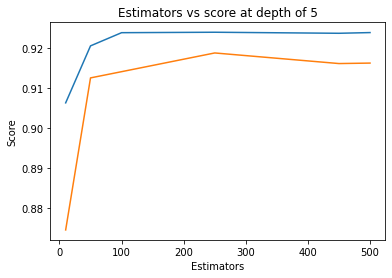

In [189]:
estimators = [10,50,100,250,450,500]   # no of estimators 
train_scores = []
test_scores = []

# we are iterating the eastimator (i) each iteration with random forest
for i in estimators:
    classification = RandomForestClassifier(bootstrap=True,  criterion='gini',
            max_depth=5, max_features='auto',
            min_impurity_decrease=0.0, 
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    
    # fitting the train data 
    classification.fit(df_final_train,y_train)

    # predicting the f1 score on final train data 
    train_classifi = f1_score(y_train,classification.predict(df_final_train))

    #predicting the f1 score on final test  data 
    test_classifi = f1_score(y_test,classification.predict(df_final_test))

    test_scores.append(test_classifi)
    train_scores.append(train_classifi)
    print('Estimators = ',i,'Train Score',train_classifi,'test Score',test_classifi)

    # here we are printing the no of estimators vs train soe
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

# **we can see that after 50 estimator there no major changes in Test Accuracy**  **so we will stop the increasing no of estimators** .

# Refer : **https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html**

depth =  3 Train Score 0.8849759014352744 test Score 0.8702997392634731
depth =  9 Train Score 0.9562150923396796 test Score 0.9224417575936302
depth =  11 Train Score 0.9625550214000284 test Score 0.9248817407757806
depth =  15 Train Score 0.9635776387421792 test Score 0.9231678486997635
depth =  20 Train Score 0.9638512691590301 test Score 0.9210487397798577
depth =  35 Train Score 0.9641481901828057 test Score 0.9205993617515903
depth =  50 Train Score 0.9641481901828057 test Score 0.9205993617515903
depth =  70 Train Score 0.9641481901828057 test Score 0.9205993617515903
depth =  130 Train Score 0.9641481901828057 test Score 0.9205993617515903
depth =  150 Train Score 0.9641481901828057 test Score 0.9205993617515903
depth =  180 Train Score 0.9641481901828057 test Score 0.9205993617515903


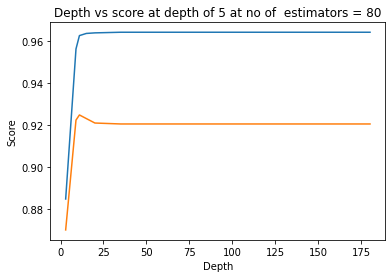

In [190]:
depths = [3,9,11,15,20,35,50,70,130,150,180]  # no of depth 
train_scores = []
test_scores = []

# here we are iterating the no of depths (i) with each iteration 
for i in depths:
    classification = RandomForestClassifier(bootstrap=True,  criterion='gini', max_depth=i, max_features='auto', 
            min_impurity_decrease=0.0, min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    


 # fitting the train data 
    classification.fit(df_final_train,y_train)

# predicting the f1 score on final train data 
    train_classifi = f1_score(y_train,classification.predict(df_final_train))


# predicting the f1 score on final test  data 
    test_classifi = f1_score(y_test,classification.predict(df_final_test))
    test_scores.append(test_classifi)
    train_scores.append(train_classifi)


    print('depth = ',i,'Train Score',train_classifi,'test Score',test_classifi)

# here we are printing the no of estimators vs train soe
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs test_score  at no of  estimators = 80')
plt.show()

# **we can see that after 3rd depth we are not getting the significant change in train and test score so we will stop the increasing the depth**

In [191]:
param_dist = {"n_estimators":sp_randint(50,100),
              "max_depth": sp_randint(10,20),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

# classiication algo with
classification = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(classification, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

# fitting the data df_final_train and df_final_test 
rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])


mean test scores [0.96265992 0.96158475 0.96200115 0.96359799 0.96370982]


# **now here we will try to findout the what would be the best parameter for given dataset with Random Forest**

In [192]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=72, n_jobs=-1, random_state=25)


#Best Parameters found

##max_depth = 14
##n_estimators = 72
##min_samples_leaf=28
##min_samples_split=111

# **now here we will try to train our model on best parameters we got**

---



In [193]:
classification = RandomForestClassifier(bootstrap=True,  criterion='gini',
            max_depth=14, max_features='auto', min_impurity_decrease=0.0,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=72, n_jobs=-1,
             random_state=25, verbose=0, warm_start=False)

# **Fitting the data**

In [194]:
classification.fit(df_final_train,y_train)

# predicting the y_train_pred
y_train_pred = classification.predict(df_final_train)

# predicting the y_test_pred
y_test_pred = classification.predict(df_final_test)

# **now here we will print the F1 train and test score of this model**

In [195]:
from sklearn.metrics import f1_score

# printing the f1 score 
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9651837915478141
Test f1 score 0.9219529654504495


#**Confusion Matrix**



# Refer : **https://vitalflux.com/python-draw-confusion-matrix-matplotlib/**

In [196]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(24,6))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.show()

Train confusion_matrix


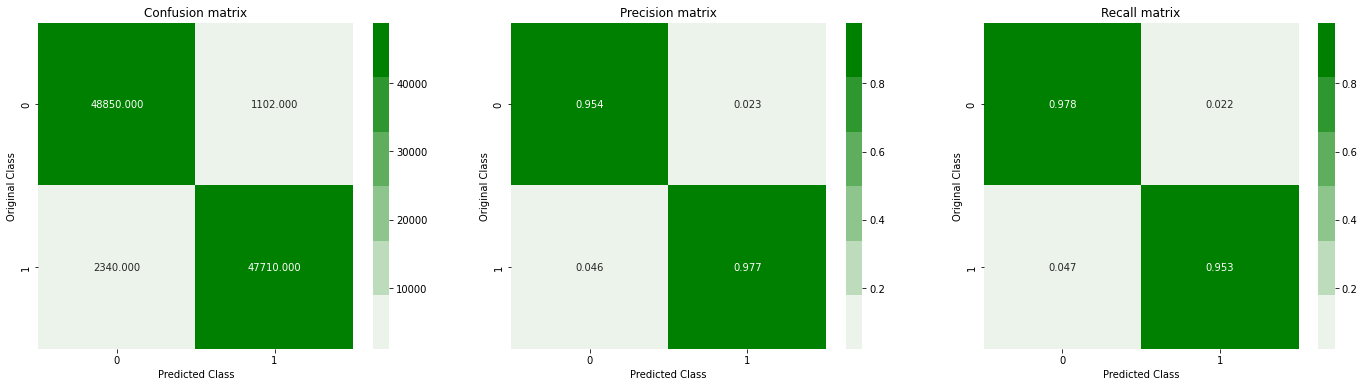

Test confusion_matrix


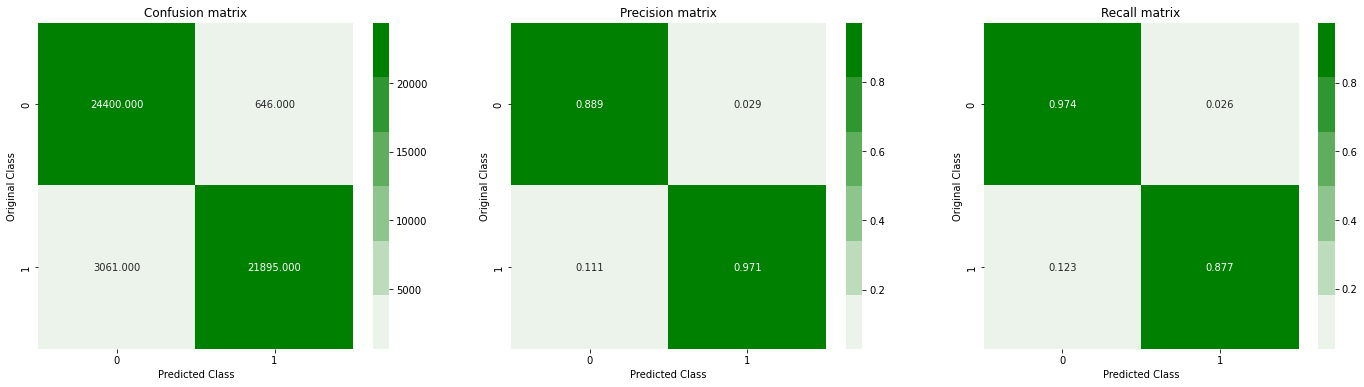

In [197]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

#ROC/AUC Curve



#refer : **https://www.projectpro.io/recipes/plot-roc-curve-in-python**

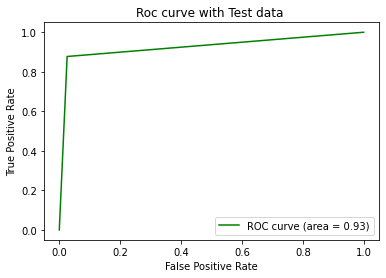

In [198]:
from sklearn.metrics import roc_curve, auc
false_positive_rate,true_positive_rate,ths = roc_curve(y_test,y_test_pred)
auc_score = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, color='green',label='ROC curve (area = %0.2f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve with Test data ')
plt.legend()
plt.show()



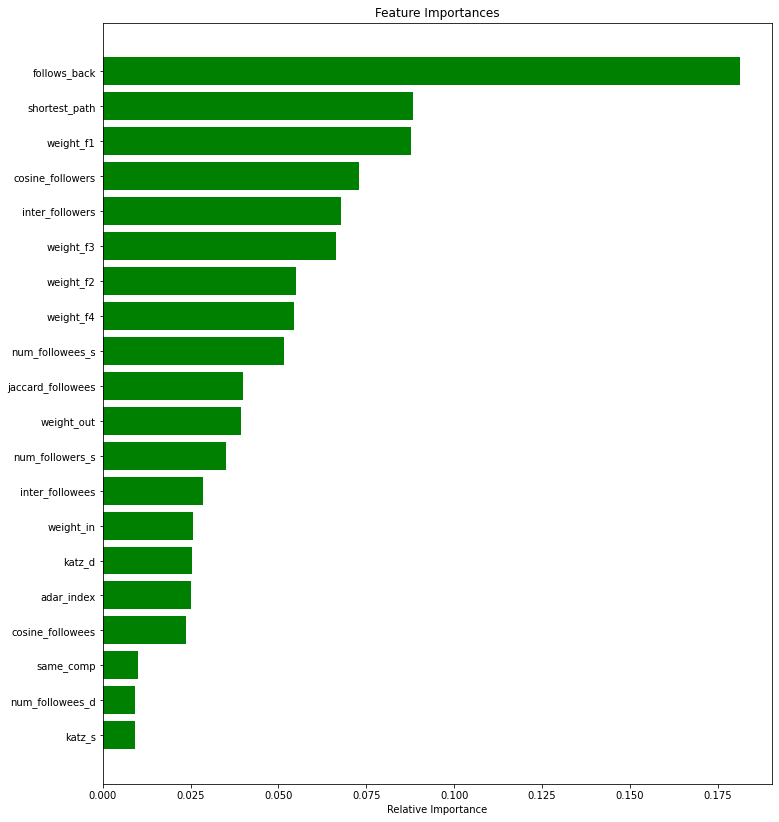

In [199]:
features = df_final_train.columns
importances = classification.feature_importances_
indices = (np.argsort(importances))[-20:]
plt.figure(figsize=(12,14))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# HERE WE CAN SEE THE **FOLLOW BACK** IS MOST **IMP** FEATURE

# THE FEATURE WE HAVE ADDDED BY OWN LIKE **NUM FOLLOWES,NUM FOLLOWEE, WEIGHT_N,KARTZ,ADAR_INEX ETC** ARE **IMPORTANT** NOT LIKE ALREADY GIVEN FEATURE IN DATASET 

#6.2 XGBOOST (Tuning)


# Ref : https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

In [200]:
import xgboost as xgb
classification = xgb.XGBClassifier()
param_dist = {"n_estimators":sp_randint(50,100),
              "max_depth": sp_randint(10,20)
              }

# intiating the randomsearchcv model with number of estimator and depth got from best parameter 
model = RandomizedSearchCV(classification, param_distributions=param_dist,
                                   n_iter=5,cv=3,scoring='f1',random_state=25)


model.fit(df_final_train,y_train)


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f64220781d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f64222579d0>},
                   random_state=25, scoring='f1')

# here we ae trying to findout what would be best parameter for xgboost model

In [201]:
print(model.best_estimator_)

XGBClassifier(max_depth=14, n_estimators=75)


##**Best Parameter we got**

##**max_depth = 14**
##**n_estimators = 75**





# **HERE WE WILL  TRAIN OUR XG BOOST  MODEL ON BEST PARAMETER THAT WE FOUND**

In [202]:
classification=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=14, min_child_weight=1,  n_estimators=75,
       n_jobs=1,  objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       silent=True, subsample=1)

# **Fitting the data on final train and test data** 

In [203]:
classification.fit(df_final_train,y_train)
y_train_pred = classification.predict(df_final_train)
y_test_pred = classification.predict(df_final_test)

# **here we will print f1 score on train and test data**

In [204]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9968443513889862
Test f1 score 0.927868713425494


#**Confusion Matrix**



Train confusion_matrix


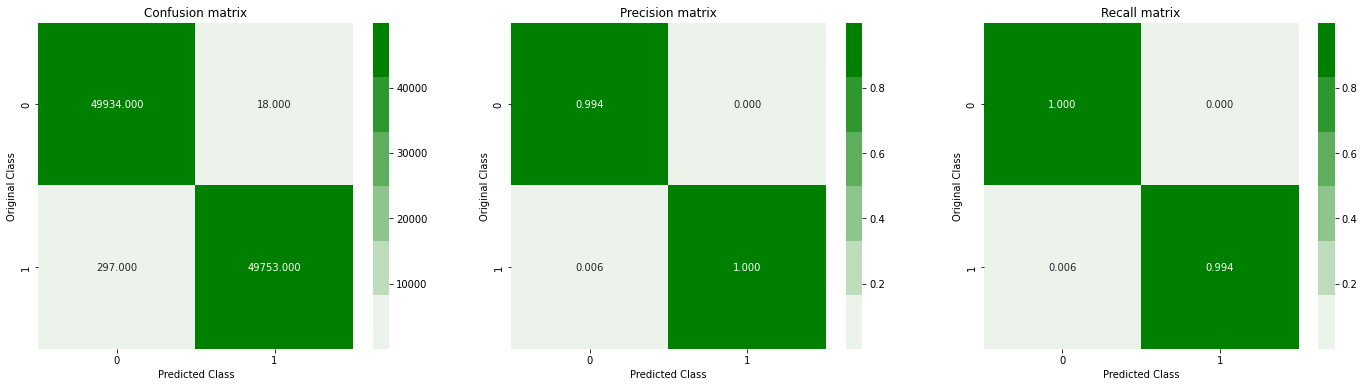

Test confusion_matrix


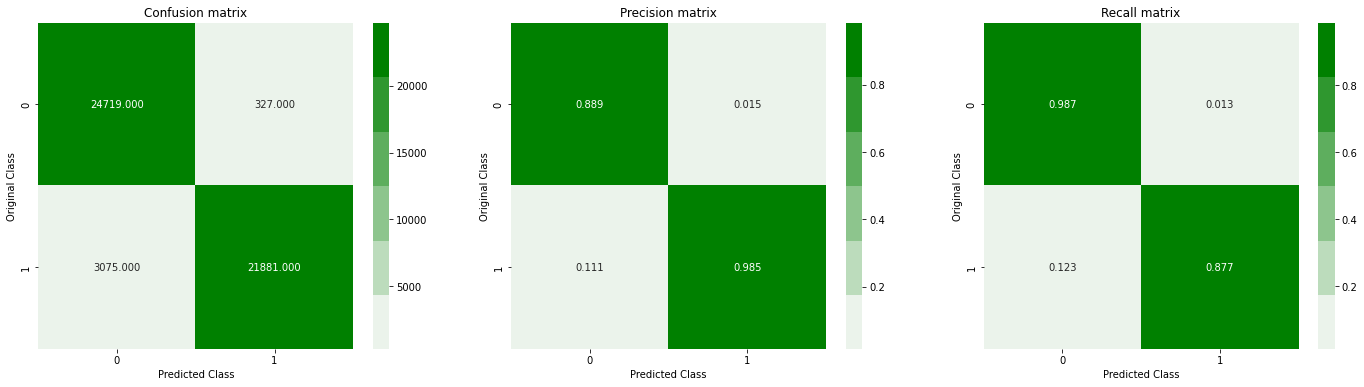

In [205]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

#**ROC/AUC Curve**



# refer : **https://www.projectpro.io/recipes/plot-roc-curve-in-python**

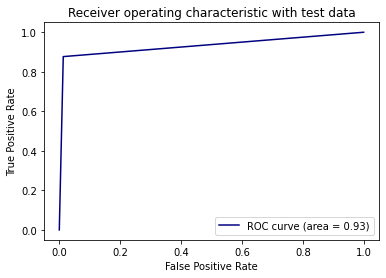

In [206]:
# importing the necessary libraries for this plot 

from sklearn.metrics import roc_curve, auc
false_positive_rate,true_positive_rate,ths = roc_curve(y_test,y_test_pred)
auc_score = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, color='navy',label='ROC curve (area = %0.2f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

#Feature Importance



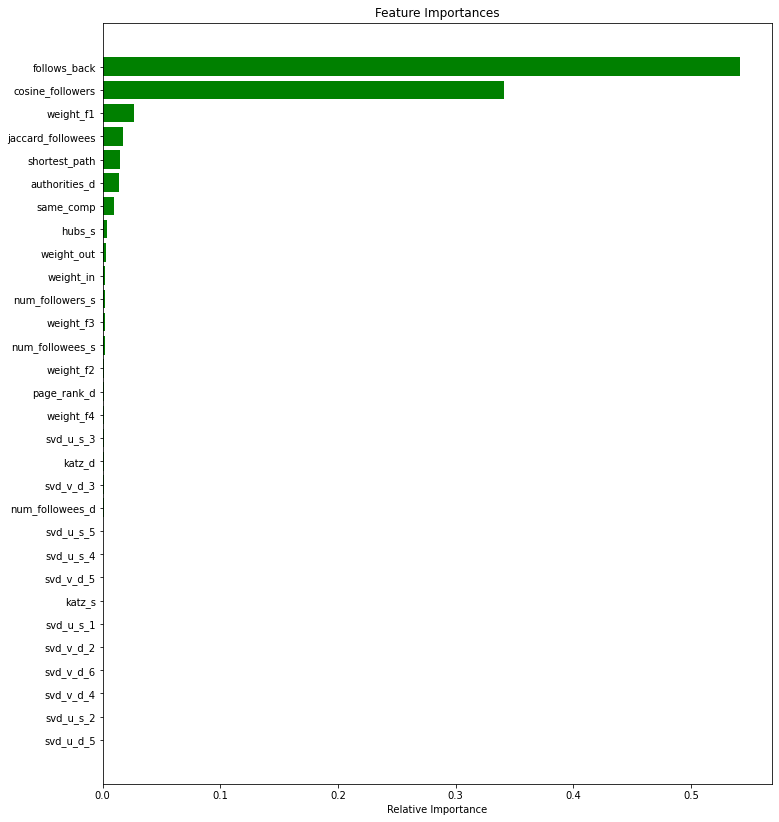

In [207]:
features = df_final_train.columns
importances = classification.feature_importances_
indices = (np.argsort(importances))[-30:]
# fig size 
plt.figure(figsize=(12,14))
# plot title 
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# we can see that still **follow back** is most imp feature

#Summary:


In [208]:
from prettytable import PrettyTable 


summary = PrettyTable()
print(" This is performence of model random forest and xg boost ")
summary.field_names = ["Model", "n_estimators", "max_depth", "Train f1-Score","Test f1-Score"]
summary.add_row(['Random Forest','72','14','0.962','0.926'])
summary.add_row(['XGBOOST','75','14','0.996','0.927'])
print(summary)
print('**********************Done****************')

 This is performence of model random forest and xg boost 
+---------------+--------------+-----------+----------------+---------------+
|     Model     | n_estimators | max_depth | Train f1-Score | Test f1-Score |
+---------------+--------------+-----------+----------------+---------------+
| Random Forest |      72      |     14    |     0.962      |     0.926     |
|    XGBOOST    |      75      |     14    |     0.996      |     0.927     |
+---------------+--------------+-----------+----------------+---------------+
**********************Done****************


# HERE YOU SEE SOME DIFF BETWEEN TRAIN AND TEST F1 SCORE I DONT THINK WE ARE OVERFITTING BECAUSE GENERALLY RANDOM FOREST AND XGBOOST AVOIDS THE OVERFITTING DUE TO NO OF DEPTH AND OTHER PARAMETER .

**the given dataset is fully graph dataset ans nodes connected to each other**
**in the given dataset we have observed that 90% users has less than 12 users big insights**


**first case study that i have seen most big and imp part is featurization and we have done bunch of featurization tech written below**

###1.calculated the jaccard distance
###2.we have similarty matrix
###3.calculated the hits score
###4.calculated the graph and weight features
###5.svd feature using adjency matrix


# As per instruction we have done the modeling and we have used two model random forest and xg boost .

# And we have seen xgboost took lot of time to run and its also given better result than random forest 